In [8]:
import matplotlib.pyplot as plt 

In [9]:
mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams
mol_weight_H2=2.01588 #in grams
mol_weight_H2O=18.0153 #in grams
mol_weight_cao=56.077#in grams
mol_weight_mgo=40.3044 #in grams

In [10]:
#Mass flow rate of waste gases from the shaft furnace
#It is assumed that the waste gas stream is a mixture of unreacted hydrogen and water/steam produced from the reduction reaction. Amount of water produced would depend on the metallization rate. For ease of calculations, it is assumed that metallization is complete.Amount of unused hydrogen in the waste stream depends on the amount of hydrogen entering the shaft furnace or lambda_h2.

#Hydrogen is separated from the waste gas stream is mixed with the incoming hydrogen from the electrolyser.The mixed stream is heated to a temperature of 800-900 C and is fed to the shaft furnace.Water separated from the waste stream is fed back to the electrolyser.Hydrogen can be fed back to the shaft furnace from the storage to provide flexibility to the grid.It is not considered in the calculations as only steady state calculations are done in this analysis.

# Mass flow rate of water in the waste stream per ton of steel production
m3=54.14
lambda_h2=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
water_tls=((3*mol_weight_H2O)/(2*mol_weight_fe))*1000
print("Amount of water in the waste stream per ton of steel production in kg/tls",water_tls) #kg/tls


Amount of water in the waste stream per ton of steel production in kg/tls 483.89202256244965


Amount of hydrogen in the waste stream per ton of steel production in kg/tls [0.0, 27.07, 54.14, 81.21000000000001, 108.28, 135.35, 162.42000000000002, 189.49, 216.56] [483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965]


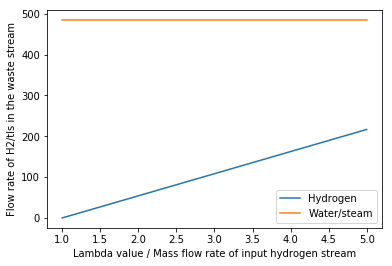

In [11]:
## Calculation of the hydrogen in the waste stream 
m5_h2=[]
m5_h2o=[]
for j in range(len(lambda_h2)):
    m5_h2.append(m3*(lambda_h2[j]-1)) #Kg/tls
    m5_h2o.append(water_tls)
    # The value varies with input flow rate of hydrogen inside the shaft furnace
print("Amount of hydrogen in the waste stream per ton of steel production in kg/tls",m5_h2,m5_h2o)
plt.plot(lambda_h2,m5_h2,label='Hydrogen')
plt.plot(lambda_h2,m5_h2o,label='Water/steam')
plt.xlabel('Lambda value / Mass flow rate of input hydrogen stream')
plt.ylabel('Flow rate of H2/tls in the waste stream')
plt.savefig('Flow rate of Waste stream variation with lambda.svg')
plt.savefig('Flow rate of Waste stream variation with lambda.pdf')
plt.legend()
plt.show()

In [18]:
T5=[523,573,623,673,723,773] # K Temperature of the exhaust gas leaving the reduction shaft furnace

In [27]:
def H2O_enthalpy(T):# 500 -1700 K reference :https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1
    t=T/1000
    A=30.09200
    B=6.832514
    C=6.793435
    D=-2.534480
    E=0.082139
    F=-250.8810
    G=223.3967
    H=-241.8264
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2O_en_per_mol=[]
for i in range(len(T5)):
    H2O_en_per_mol.append(H2O_enthalpy(T5[i]))
mol_per_kg_H2O=1000/mol_weight_H2O # Number of moles in one kg
h5_h2o=[]
for i in range(len(T5)):
    h5_h2o.append((mol_per_kg_H2O)*(H2O_en_per_mol[i]))
print("Enthalpy per Kg of Water in kJ/kg at T5:",h5_h2o)
# Multiplying the specific enthalpy with mass flow rate 
H5_h2o=[]
lambda_hyd=[]
for j in range(len(T5)):
     for i in range(len(m5_h2o)):
            H5_h2o.append(m5_h2o[i]*h5_h2o[j])
            lambda_hyd.append(lambda_h2[i])
print("Enthalpy in water stream per Kg of steel in kJ:",H5_h2o)

Enthalpy per Kg of Water in kJ/kg at T5: [429.4931546384586, 528.6695764094306, 629.405546043845, 731.7594546013953, 835.7768890808147, 941.493067212449]
Enthalpy in water stream per Kg of steel in kJ: [207828.3112747307, 207828.3112747307, 207828.3112747307, 207828.3112747307, 207828.3112747307, 207828.3112747307, 207828.3112747307, 207828.3112747307, 207828.3112747307, 255818.99059599292, 255818.99059599292, 255818.99059599292, 255818.99059599292, 255818.99059599292, 255818.99059599292, 255818.99059599292, 255818.99059599292, 255818.99059599292, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 354092.5625162642, 354092.5625162642, 354092.5625162642, 354092.5625162642, 354092.5625162642, 354092.5625162642, 354092.5625162642, 354092.5625162642, 354092.5625162642, 404425.76926826756, 404425.76926826756, 404425.76926826756, 404425.76926826756, 404425.76926826756, 4044

In [38]:
m5_h2

[0.0,
 27.07,
 54.14,
 81.21000000000001,
 108.28,
 135.35,
 162.42000000000002,
 189.49,
 216.56]

In [34]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_en_per_mol=[]
for i in range(len(T5)):
    H2_en_per_mol.append(H2_enthalpy_1(T5[i]))
mol_per_kg_H2=1000/mol_weight_H2 # Number of moles in one kg
h5_h2=[]
for i in range(len(T5)):
    h5_h2.append((mol_per_kg_H2)*(H2_en_per_mol[i]))
print("Enthalpy per Kg of hydrogen in kJ/kg at T5:",h5_h2)
# Multiplying the specific enthalpy with mass flow rate 
H5_h2=[]
T5_waste=[]
for j in range(len(T5)):
     for i in range(len(m5_h2)):
            H5_h2.append(m5_h2[i]*h5_h2[j])
            T5_waste.append(T5[j])
print("Enthalpy in waste hydrogen stream per Kg of steel in kJ:",H5_h2)
H5_h2
T5_waste

Enthalpy per Kg of hydrogen in kJ/kg at T5: [3251.9126703940874, 3978.3671906830423, 4705.692808769396, 5434.22096141344, 6164.361375994569, 6896.560067779419]
Enthalpy in waste hydrogen stream per Kg of steel in kJ: [0.0, 88029.27598756795, 176058.5519751359, 264087.8279627039, 352117.1039502718, 440146.3799378397, 528175.6559254078, 616204.9319129756, 704234.2079005436, 0.0, 107694.39985178996, 215388.79970357992, 323083.1995553699, 430777.59940715984, 538471.9992589498, 646166.3991107398, 753860.7989625297, 861555.1988143197, 0.0, 127383.10433338754, 254766.20866677508, 382149.31300016266, 509532.41733355017, 636915.5216669377, 764298.6260003253, 891681.7303337129, 1019064.8346671003, 0.0, 147104.36142546183, 294208.72285092366, 441313.0842763855, 588417.4457018473, 735521.807127309, 882626.168552771, 1029730.5299782328, 1176834.8914036946, 0.0, 166869.262448173, 333738.524896346, 500607.787344519, 667477.049792692, 834346.312240865, 1001215.574689038, 1168084.8371372109, 1334954.09

[523,
 523,
 523,
 523,
 523,
 523,
 523,
 523,
 523,
 573,
 573,
 573,
 573,
 573,
 573,
 573,
 573,
 573,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 673,
 673,
 673,
 673,
 673,
 673,
 673,
 673,
 673,
 723,
 723,
 723,
 723,
 723,
 723,
 723,
 723,
 723,
 773,
 773,
 773,
 773,
 773,
 773,
 773,
 773,
 773]

In [29]:
H5=[]
for i in range(len(H5_h2)):
    H5.append((H5_h2[i]+H5_h2o[i]))
print("Energy contained in the waste stream in kJ",H5)
H5_KWh=[]
for i in range(len(H5)):
    H5_KWh.append(H5[i]/3600)
print("Energy contained in the waste stream in KWh",H5_KWh )

Energy contained in the waste stream in kJ [207828.3112747307, 295857.5872622986, 383886.8632498666, 471916.1392374346, 559945.4152250024, 647974.6912125704, 736003.9672001385, 824033.2431877063, 912062.5191752743, 255818.99059599292, 363513.3904477829, 471207.79029957287, 578902.1901513628, 686596.5900031527, 794290.9898549427, 901985.3897067327, 1009679.7895585226, 1117374.1894103126, 304564.3226871792, 431947.42702056677, 559330.5313539542, 686713.6356873419, 814096.7400207294, 941479.8443541169, 1068862.9486875045, 1196246.0530208922, 1323629.1573542794, 354092.5625162642, 501196.92394172604, 648301.2853671878, 795405.6467926498, 942510.0082181115, 1089614.3696435732, 1236718.7310690351, 1383823.092494497, 1530927.4539199588, 404425.76926826756, 571295.0317164406, 738164.2941646136, 905033.5566127866, 1071902.8190609594, 1238772.0815091324, 1405641.3439573054, 1572510.6064054784, 1739379.8688536515, 455580.9845219563, 642270.8655567452, 828960.746591534, 1015650.627626323, 1202340.

In [31]:
len(lambda_hyd)

54

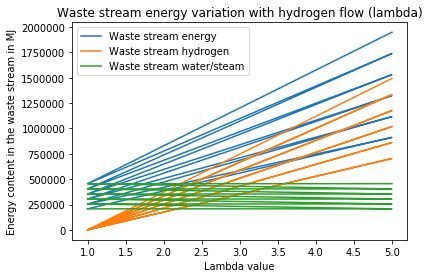

In [32]:
plt.plot(lambda_hyd,H5,label='Waste stream energy')
plt.plot(lambda_hyd,H5_h2,label='Waste stream hydrogen')
plt.plot(lambda_hyd,H5_h2o,label='Waste stream water/steam')
plt.xlabel('Lambda value')
plt.title('Waste stream energy variation with hydrogen flow (lambda)')
plt.ylabel('Energy content in the waste stream in MJ')
plt.savefig('Energy content in waste stream with lambda.svg')
plt.savefig('Energy content in waste stream with lambda.pdf')
plt.legend()
plt.show()

In [36]:
import pandas as pd

df = pd.DataFrame(list(zip(lambda_hyd,T5_waste,H5,H5_h2o,H5_h2)), 
               columns =['Lambda', 'Waste gas temperature in K','Waste gas enthalpy in kJ','Water stream enthalpy kJ','Hydrogen stream enthalpy in kJ']) 

In [44]:
df['Waste gas enthalpy in KWh']=df['Waste gas enthalpy in kJ']/3600

In [45]:
df

,Lambda,Waste gas temperature in K,Waste gas enthalpy in kJ,Water stream enthalpy kJ,Hydrogen stream enthalpy in kJ,Waste gas enthalpy in KWh
0,1.0,523,2.078283e+05,207828.311275,0.000000e+00,57.730086
1,1.5,523,2.958576e+05,207828.311275,8.802928e+04,82.182663
2,2.0,523,3.838869e+05,207828.311275,1.760586e+05,106.635240
3,2.5,523,4.719161e+05,207828.311275,2.640878e+05,131.087816
4,3.0,523,5.599454e+05,207828.311275,3.521171e+05,155.540393
5,3.5,523,6.479747e+05,207828.311275,4.401464e+05,179.992970
6,4.0,523,7.360040e+05,207828.311275,5.281757e+05,204.445546
7,4.5,523,8.240332e+05,207828.311275,6.162049e+05,228.898123
8,5.0,523,9.120625e+05,207828.311275,7.042342e+05,253.350700
9,1.0,573,2.558190e+05,255818.990596,0.000000e+00,71.060831


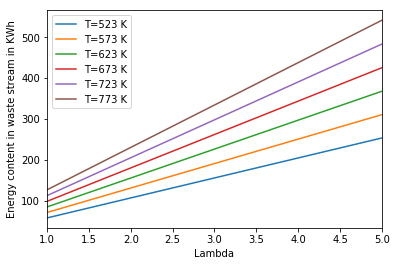

In [55]:
ax1=df.iloc[0:9].plot('Lambda','Waste gas enthalpy in KWh',label='T=523 K')
df.iloc[9:18].plot('Lambda','Waste gas enthalpy in KWh',label='T=573 K',ax=ax1)
df.iloc[18:27].plot('Lambda','Waste gas enthalpy in KWh',label='T=623 K',ax=ax1)
df.iloc[27:36].plot('Lambda','Waste gas enthalpy in KWh',label='T=673 K',ax=ax1)
df.iloc[36:45].plot('Lambda','Waste gas enthalpy in KWh',label='T=723 K',ax=ax1)
df.iloc[45:54].plot('Lambda','Waste gas enthalpy in KWh',label='T=773 K',ax=ax1)
plt.ylabel('Energy content in waste stream in KWh')
plt.savefig('Waste enthalpy variation.pdf')
plt.savefig('Waste enthalpy variation.png')